In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

# Mapa de Rulkov

Se simula un mapa de Rulkov como un sistema dinamico discreto de 4 variables

## Variables: 
- sigma: Emula la accion de una corriente DC bias externa sobre la neurona
- ai: Parametro de control que produce los diferentes patrones de disparo
- xi(n): Potencial trans-membrana de la i-ava neurona en el tiempo n
- yi(n): Variacion de la corriente de recuperacion ionica
- nu: Parametro positivo pequeño << 1
- gamma: Funcion sigmoidal de entrada-salida
- f: Funcion de acoplamiento interno
- gc: Fuerza de la sinapsis quimica
- e: Fuerza de acoplamiento interno
- vs: Potencial sinaptico reverso
- k: Slope de la sigmoidal
- titas: Umbral de disparo sinaptico

In [38]:
#Constants
a = 4.1
nu = 0.001
sigma = -1.6
vs = -1.4
k=50
titas = -1.4
e=0.5
gc = 1.0

steps = int(2e5)

#Functions
def f(x, y):
    return a/(1 + x**2) + y

def gamma(x):
    return 1/(1 + math.exp(-1*k*(x-titas)))

def next_x1(x1, y1, x2, y2): 
    return f(x1, y1) + gc*(vs-x1)*gamma(x2) + e*(f(x2,y2)-f(x1,y1))

def next_y1(x1, y1):
    return y1 - nu*(x1-sigma)

def next_x2(x1, y1, x2, y2):
    return next_x1(x2, y2, x1, y1)

def next_y2(x2, y2):
    return next_y1(x2, y2)

def run_sim():
    global x1, x2, y1, y2
    x1 = np.zeros(steps)
    x2 = np.zeros(steps)
    y1 = np.zeros(steps)
    y2 = np.zeros(steps)
    
    x1[0], y1[0] = [0,-8.7]
    x2[0], y2[0] = [0,-8.7]
    
    for i in range(1, steps):
        x1[i] = next_x1(x1[i-1], y1[i-1], x2[i-1], y2[i-1])
        y1[i] = next_y1(x1[i-1], y1[i-1])
        x2[i] = next_x2(x1[i-1], y1[i-1], x2[i-1], y2[i-1])
        x2[i] = next_y2(x2[i-1], y2[i-1])


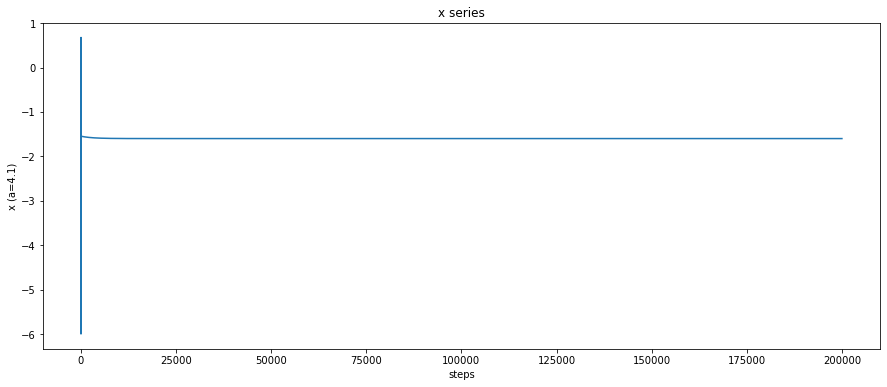

In [41]:
plt.rcParams['figure.figsize'] = [15, 6]
run_sim()

plt.title("x series")
plt.xlabel("steps")
plt.ylabel(f"x (a={a})")
plt.plot(x1)


In [40]:
y1.mean()

-8.849383232875544

In [25]:
plt.rcParams['figure.figsize'] = [15, 6*len(a_list)]
i=0
for a in a_list:
    run_sim()
    plt.subplot(len(a_list),1,i+1)
    plt.title("x series")
    plt.xlabel("steps")
    plt.ylabel(f"x (a={a})")
    plt.plot(x)
    i+=1

array([[ 0.        , -2.9       ],
       [-0.2       , -2.9016    ],
       [-0.15929231, -2.903     ],
       ...,
       [-1.67521628, -2.75103239],
       [-1.67388458, -2.75095717],
       [-1.67254575, -2.75088329]])